#Carga de datos

In [23]:
!pip install azure-storage-blob
!pip install wandb

In [24]:
#!pip install azure-storage-blob

import pandas as pd
from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

connection_string = ""
container_name =""
blob_name = "properties_tienda_inglesa.csv"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

data = StringIO(csv_data)
df = pd.read_csv(data, header=None, names=['id','image_urls','images','link','product_name','property_type','source','url'])
#id,image_urls,images,link,product_name,property_type,source,url

valid_categories=["WAREHOUSE",
             "DRINKS",
            "CLEANING",
             "FROZEN",
            "TECHNOLOGY",
             "PERFUMERY"]


In [25]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import wandb
from wandb.keras import WandbCallback

wandb.login()

wandb: Currently logged in as: piodanilod (mlinprod). Use `wandb login --relogin` to force relogin


True

In [26]:
df = df_filtrado = df.query('property_type in @valid_categories')
df = df[~df['id'].duplicated()]
df['md5']=''

In [27]:
df

,id,image_urls,images,link,product_name,property_type,source,url,md5
0,29465,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Tapas-para-Em...,Tapas para Empanadas Hojaldradas TIENDA INGLES...,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Tapas-para-Em...,
1,218557,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Galleta-Arroz...,Galleta Arroz CEREALITAS 160 gr,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Galleta-Arroz...,
3,99775,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Refresco-PASO...,Refresco PASO DE LOS TOROS Pomelo sin Azúcar 1...,DRINKS,tienda_inglesa,https://www.tiendainglesa.com.uy/Refresco-PASO...,
4,86019,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Pizza-con-Muz...,Pizza con Muzzarella y Tomate Pack Familiar SI...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Pizza-con-Muz...,
5,57950,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Papel-Higieni...,Papel Higiénico HIGIENOL Doble Hoja Premium 4 ...,FROZEN,tienda_inglesa,https://www.tiendainglesa.com.uy/Papel-Higieni...,
...,...,...,...,...,...,...,...,...,...
25736,108410,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Calefon-JAMES...,Calefón JAMES 60 L,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Calefon-JAMES...,
25737,301502,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Resma-de-Pape...,Resma de Papel para Impresora FANACOPY A4 75 gr,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Resma-de-Pape...,
25738,461922,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Lavarropa-JAM...,Lavarropa JAMES Carga Frontal Blanco Display L...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Lavarropa-JAM...,
25739,536075,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Aire-Acondici...,Aire Acondicionado ECOSYSTEM 12000 BTU Inverte...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Aire-Acondici...,


In [28]:
def get_image_from_blob(blob_client):
    stream = io.BytesIO()
    download_stream = blob_client.download_blob()
    stream.write(download_stream.readall())

    stream.seek(0)
    image = Image.open(stream)
    return image

In [29]:
def calcular_md5(imagen):
    md5_hash = hashlib.md5(imagen).hexdigest()
    return md5_hash

In [30]:
def show_image(blob_client):

    image = get_image_from_blob(blob_client)

    plt.imshow(image)
    plt.show()


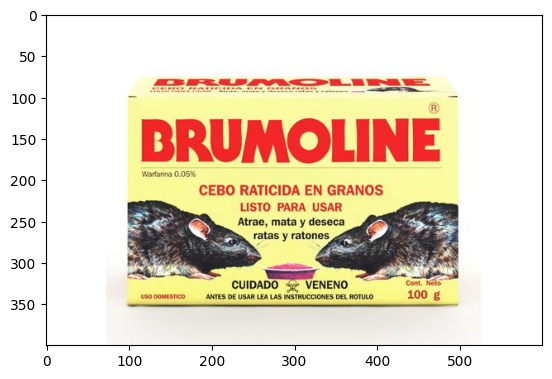

In [31]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt

try:
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)
    blob_name = 'full/0094e2445afde938bd97477f21149e43101f1ebf.jpg'
    blob_client = blob_service_client.get_blob_client(container_name, blob_name)

    show_image(blob_client)

except Exception as ex:
    print('Exception:')
    print(ex)

In [32]:
IMAGE_SIZE=32

In [33]:
import ast
import hashlib

image_ids=[]
images =[]
categories=[]
count=1;
for index, row in df.iterrows():
    lista_json = row['images']
    b=ast.literal_eval(lista_json[1:-1])
    path =  b.get("path")

    blob_client = blob_service_client.get_blob_client(container_name, path)
    imagen=get_image_from_blob(blob_client).resize((IMAGE_SIZE,IMAGE_SIZE))
    md5=calcular_md5(imagen.tobytes())
    if(md5 not in df['md5'].values):
      images.append(imagen)
      df.at[index,'md5'] = md5

      image_ids.append(row['id'])
      categories.append(row['property_type'])
      if count%100==0:
        print(f"Load {count} images of {df.shape[0]}")
      count+=1



Load 100 images of 6229
Load 200 images of 6229
Load 300 images of 6229
Load 400 images of 6229
Load 500 images of 6229
Load 600 images of 6229
Load 700 images of 6229
Load 800 images of 6229
Load 900 images of 6229
Load 1000 images of 6229
Load 1100 images of 6229
Load 1200 images of 6229
Load 1300 images of 6229
Load 1400 images of 6229
Load 1500 images of 6229
Load 1600 images of 6229
Load 1700 images of 6229
Load 1800 images of 6229
Load 1900 images of 6229
Load 2000 images of 6229
Load 2100 images of 6229
Load 2200 images of 6229
Load 2300 images of 6229
Load 2400 images of 6229
Load 2500 images of 6229
Load 2600 images of 6229
Load 2700 images of 6229
Load 2800 images of 6229
Load 2900 images of 6229
Load 3000 images of 6229
Load 3100 images of 6229
Load 3200 images of 6229
Load 3300 images of 6229
Load 3400 images of 6229
Load 3500 images of 6229
Load 3600 images of 6229
Load 3700 images of 6229
Load 3800 images of 6229
Load 3900 images of 6229
Load 4000 images of 6229
Load 4100

#EDA dataset

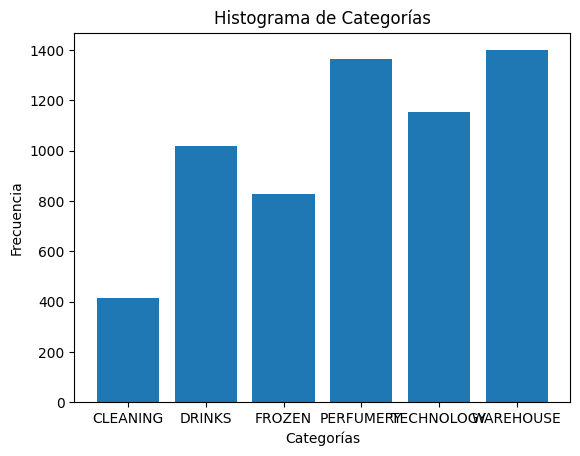

In [34]:
import numpy as np
#categories=df['property_type'].values

conteo_categorias = np.unique(categories, return_counts=True)

categorias_unicas = conteo_categorias[0]
conteos = conteo_categorias[1]

plt.bar(categorias_unicas, conteos)

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Histograma de Categorías')

plt.show()

#Funciones auxiliares

In [35]:
images_backup=images


In [36]:
images=[(np.array(imagen_pil)) for imagen_pil in images]
#images=images_backup

In [37]:
lista_np = []
for imagen_np in images:
    lista_np.append(imagen_np)
images=np.array(lista_np)

In [38]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def plot_metric(history,target, title):
    plt.plot(history.history[target])
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(target)
    plt.show()


def plot_fit(history):
    local_metrics=['loss','accuracy','f1_m','precision_m','recall_m']
    for x in local_metrics:
      plot_metric(history,x,f"{x} en train")


#Preproceamiento de datos

In [39]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from keras.optimizers import Adam
from datetime import datetime
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

#augmentation
data_augmentation = Sequential([
    preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    preprocessing.Rescaling(1./255),
    preprocessing.RandomRotation(0.15),
    preprocessing.RandomFlip("vertical"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomTranslation(0.1, 0.1),
    preprocessing.RandomContrast(0.3),
])


#Wandb, trazabilidad de experemientos, modelos y busqueda de hiperparametros

6178 6178 6178
Create sweep with ID: 6sy716oq
Sweep URL: https://wandb.ai/mlinprod/Htuning-tienda_inglesa/sweeps/6sy716oq


wandb: Agent Starting Run: bqk92sj5 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Epoch 1/25
31/31 [==============================] - 18s 512ms/step - loss: 287991.6562 - accuracy: 0.2047 - f1_m: 0.0232 - precision_m: 0.0232 - recall_m: 0.0232 - val_loss: 87.1152 - val_accuracy: 0.2235 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/25
31/31 [==============================] - 15s 478ms/step - loss: 80.9502 - accuracy: 0.2262 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 72.7282 - val_accuracy: 0.2235 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/25
31/31 [==============================] - 15s 478ms/step - loss: 66.1483 - accuracy: 0.2236 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 60.0317 - val_accuracy: 0.2235 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/25
31/31 [==============================] - 15s 479ms/step - loss: 55.7505 - accuracy: 0.2191 - f1_m: 0.0000e+00 - precis

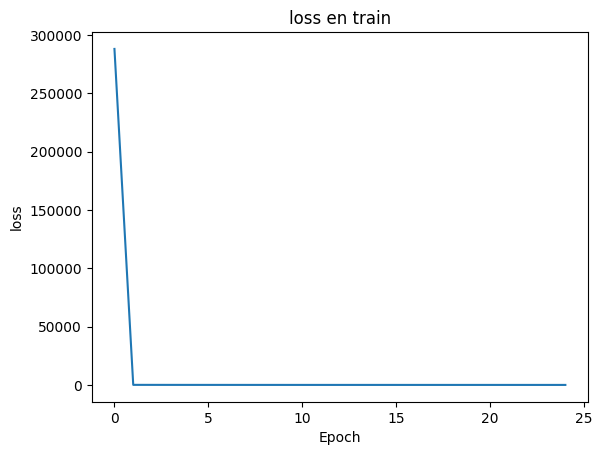

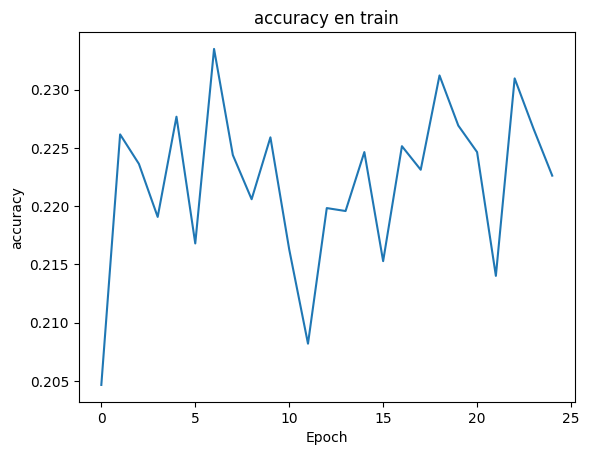

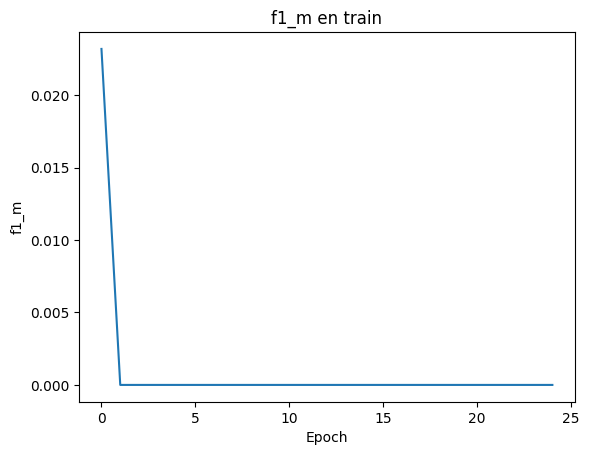

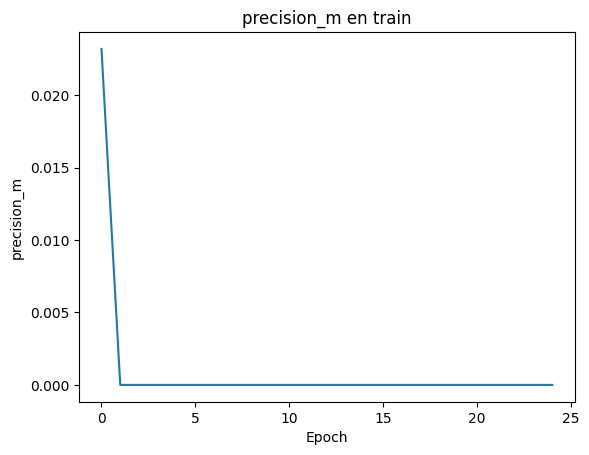

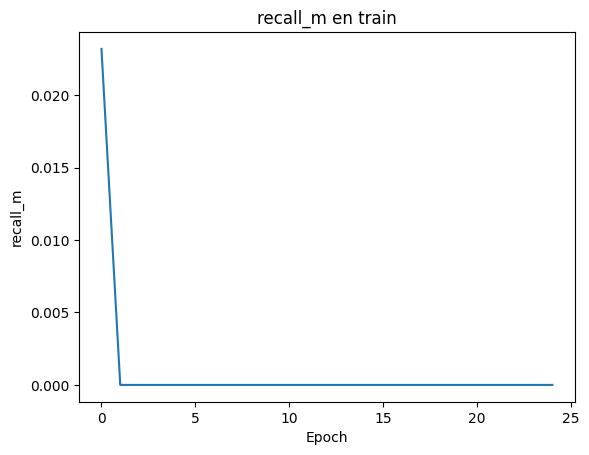

39/39 [==============================] - 1s 28ms/step - loss: 25.0777 - accuracy: 0.2443 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Loss en el conjunto de prueba: 25.077678680419922
F1-Score en el conjunto de prueba: 0.0
Precision en el conjunto de prueba: 0.0
Recall en el conjunto de prueba: 0.0
Accuracy en el conjunto de prueba: 0.2443365752696991
39/39 [==============================] - 1s 28ms/step


epoch/accuracy,▁▆▆▄▇▄█▆▅▆▄▂▅▅▆▄▆▅▇▆▆▃▇▆▅
epoch/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
epoch/f1_m,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/precision_m,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/recall_m,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,████▁█▁▁▁██▁██████▁▁██▁▁▁
epoch/val_f1_m,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_loss,█▆▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_precision_m,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: 23rg7jwf with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Epoch 1/25
124/124 [==============================] - 20s 147ms/step - loss: 6.4552 - accuracy: 0.2368 - f1_m: 0.0627 - precision_m: 0.2850 - recall_m: 0.0447 - val_loss: 2.1170 - val_accuracy: 0.3873 - val_f1_m: 0.1683 - val_precision_m: 0.9102 - val_recall_m: 0.0940
Epoch 2/25
124/124 [==============================] - 17s 137ms/step - loss: 2.1602 - accuracy: 0.3575 - f1_m: 0.1406 - precision_m: 0.7109 - recall_m: 0.0801 - val_loss: 2.0169 - val_accuracy: 0.4520 - val_f1_m: 0.1947 - val_precision_m: 0.8733 - val_recall_m: 0.1111
Epoch 3/25
124/124 [==============================] - 16s 132ms/step - loss: 2.0858 - accuracy: 0.4005 - f1_m: 0.1925 - precision_m: 0.7255 - recall_m: 0.1149 - val_loss: 1.9558 - val_accuracy: 0.4783 - val_f1_m: 0.2319 - val_precision_m: 0.8742 - val_recall_m: 0.1356
Epoch 4/25
124/124 [==============================] - 16s 132ms/step - loss: 2.0067 - accuracy: 0.4379 - f1_m: 0.2554 - precision_m: 0.6936 - recall_m: 0.1635 - val_loss: 1.9230 - val_accuracy:

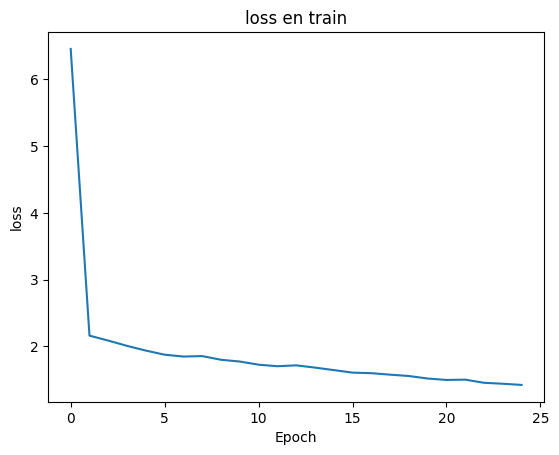

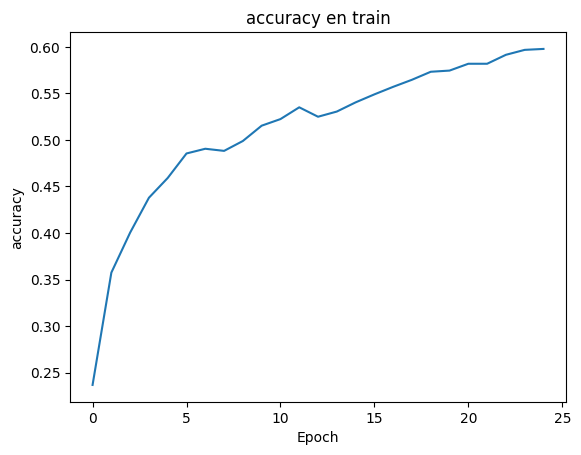

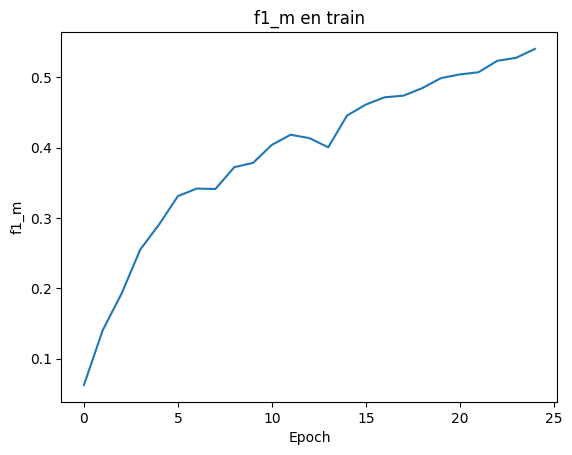

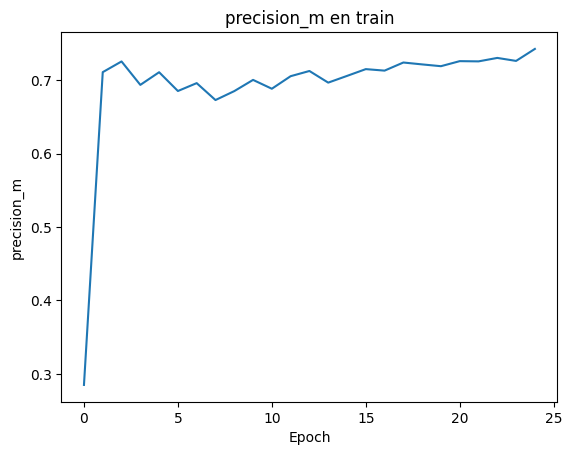

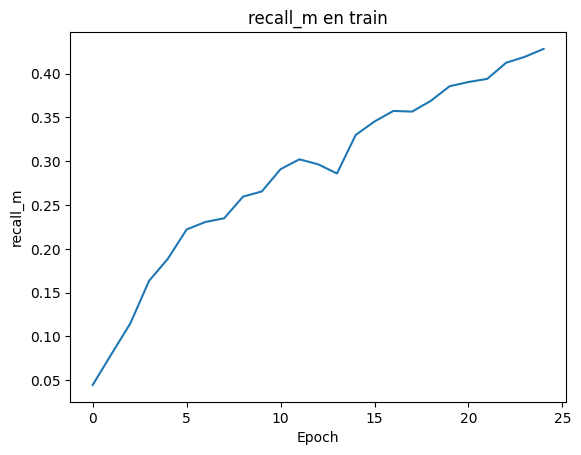

39/39 [==============================] - 2s 40ms/step - loss: 1.5136 - accuracy: 0.5930 - f1_m: 0.5005 - precision_m: 0.7770 - recall_m: 0.3736
Loss en el conjunto de prueba: 1.5135974884033203
F1-Score en el conjunto de prueba: 0.5005099177360535
Precision en el conjunto de prueba: 0.777013897895813
Recall en el conjunto de prueba: 0.3735577166080475
Accuracy en el conjunto de prueba: 0.5930420756340027
39/39 [==============================] - 2s 44ms/step


epoch/accuracy,▁▃▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇███████
epoch/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
epoch/f1_m,▁▂▃▄▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇████
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/precision_m,▁██▇█▇▇▇▇▇▇▇█▇▇██████████
epoch/recall_m,▁▂▂▃▄▄▄▄▅▅▅▆▆▅▆▆▇▇▇▇▇▇███
epoch/val_accuracy,▁▃▄▅▅▃▆▆▅▅▆▇▆▇▇▇▆▇▇▇▇▇██▇
epoch/val_f1_m,▁▂▂▂▃▃▅▅▅▄▅▆▄▇▇▇▅▆▆▆█▇███
epoch/val_loss,█▇▆▆▅▆▄▄▅▄▄▃▃▃▂▂▃▂▂▂▂▂▁▁▁
epoch/val_precision_m,▇▆▆█▆▂▄▄▂▃▆▄▆▁▃▂▂▃▃▃▁▁▂▂▂


wandb: Agent Starting Run: 0c5lkyh7 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0001


Epoch 1/25
124/124 [==============================] - 18s 137ms/step - loss: 14.2995 - accuracy: 0.1875 - f1_m: 0.1795 - precision_m: 0.1873 - recall_m: 0.1731 - val_loss: 2.3299 - val_accuracy: 0.2578 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/25
124/124 [==============================] - 17s 140ms/step - loss: 3.2129 - accuracy: 0.1839 - f1_m: 0.1299 - precision_m: 0.1954 - recall_m: 0.1003 - val_loss: 2.3302 - val_accuracy: 0.2588 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/25
124/124 [==============================] - 19s 151ms/step - loss: 2.6716 - accuracy: 0.1938 - f1_m: 0.0691 - precision_m: 0.2021 - recall_m: 0.0426 - val_loss: 2.3348 - val_accuracy: 0.2730 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/25
124/124 [==============================] - 17s 140ms/step - loss: 2.5033 - accuracy: 0.2077 - f1_m: 0.0337 - precision_m: 0.1905 - recall_m: 0.01

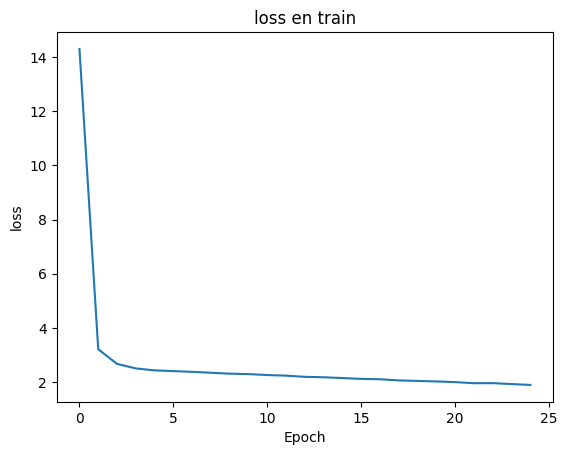

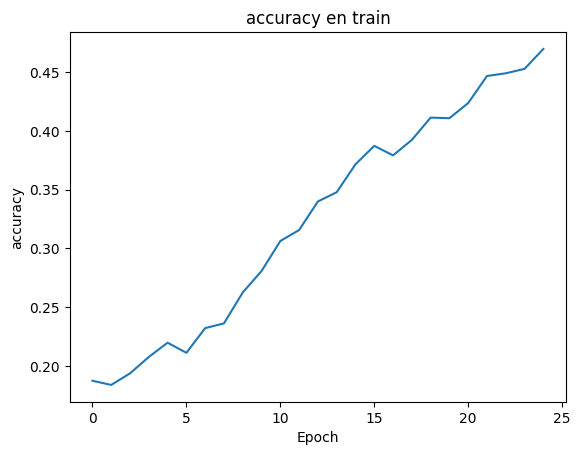

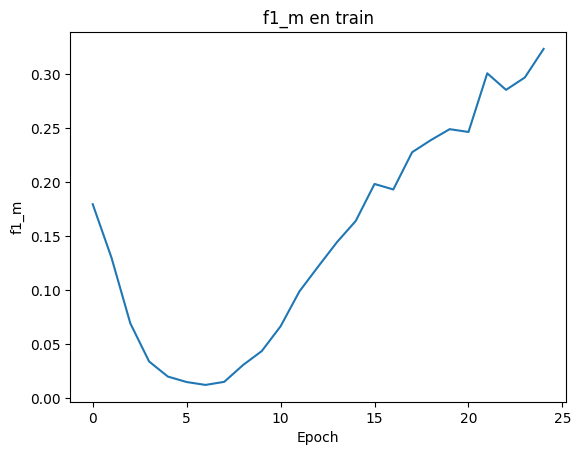

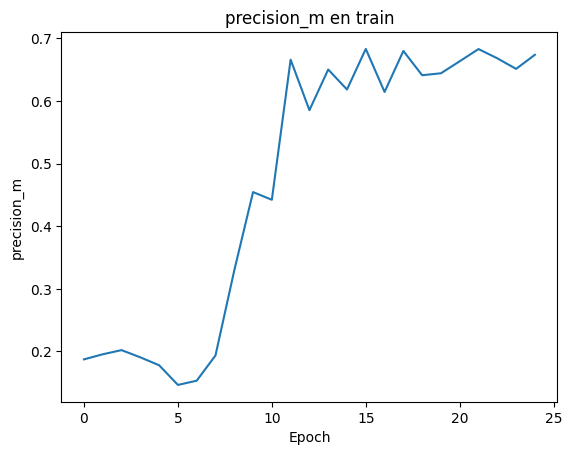

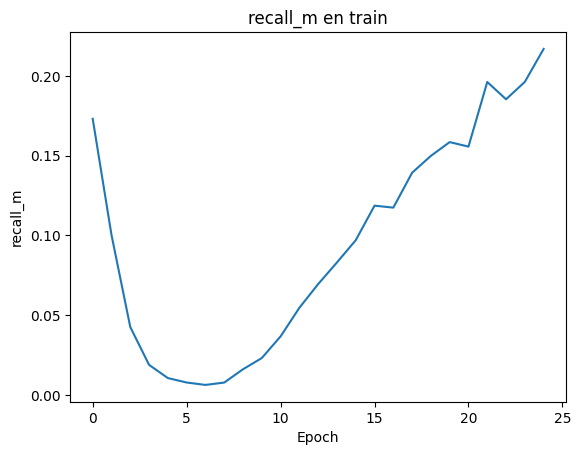

39/39 [==============================] - 1s 30ms/step - loss: 1.8401 - accuracy: 0.5162 - f1_m: 0.2391 - precision_m: 0.8434 - recall_m: 0.1425
Loss en el conjunto de prueba: 1.8401473760604858
F1-Score en el conjunto de prueba: 0.23908783495426178
Precision en el conjunto de prueba: 0.8434454202651978
Recall en el conjunto de prueba: 0.1424679458141327
Accuracy en el conjunto de prueba: 0.516181230545044
39/39 [==============================] - 1s 28ms/step


epoch/accuracy,▁▁▁▂▂▂▂▂▃▃▄▄▅▅▆▆▆▆▇▇▇▇▇██
epoch/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
epoch/f1_m,▅▄▂▁▁▁▁▁▁▂▂▃▃▄▄▅▅▆▆▆▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/precision_m,▂▂▂▂▁▁▁▂▃▅▅█▇█▇█▇█▇▇█████
epoch/recall_m,▇▄▂▁▁▁▁▁▁▂▂▃▃▄▄▅▅▅▆▆▆▇▇▇█
epoch/val_accuracy,▂▂▂▁▂▃▃▄▄▅▅▅▆▆▆▇▇▇▇▇█████
epoch/val_f1_m,▁▁▁▁▁▁▁▁▁▂▄▄▅▅▅▆▅▆▇▆▆█▇██
epoch/val_loss,███████▇▇▆▆▅▅▄▄▄▃▃▂▃▃▂▂▁▁
epoch/val_precision_m,▁▁▁▁▁▁▁▁▁▅▇██████████████


wandb: Agent Starting Run: znl86qft with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Epoch 1/25
62/62 [==============================] - 19s 279ms/step - loss: 5.7544 - accuracy: 0.2198 - f1_m: 0.0380 - precision_m: 0.0709 - recall_m: 0.0345 - val_loss: 2.2849 - val_accuracy: 0.3610 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/25
62/62 [==============================] - 16s 263ms/step - loss: 2.2131 - accuracy: 0.3220 - f1_m: 0.0936 - precision_m: 0.6013 - recall_m: 0.0527 - val_loss: 2.0429 - val_accuracy: 0.4479 - val_f1_m: 0.1635 - val_precision_m: 0.8110 - val_recall_m: 0.0914
Epoch 3/25
62/62 [==============================] - 16s 264ms/step - loss: 2.1009 - accuracy: 0.3926 - f1_m: 0.1816 - precision_m: 0.7044 - recall_m: 0.1062 - val_loss: 1.9865 - val_accuracy: 0.4641 - val_f1_m: 0.1552 - val_precision_m: 0.9369 - val_recall_m: 0.0854
Epoch 4/25
62/62 [==============================] - 16s 263ms/step - loss: 2.0169 - accuracy: 0.4313 - f1_m: 0.2365 - precision_m: 0.6770 - recall_m: 0.1464 - val_loss: 1.8871 - val_accur

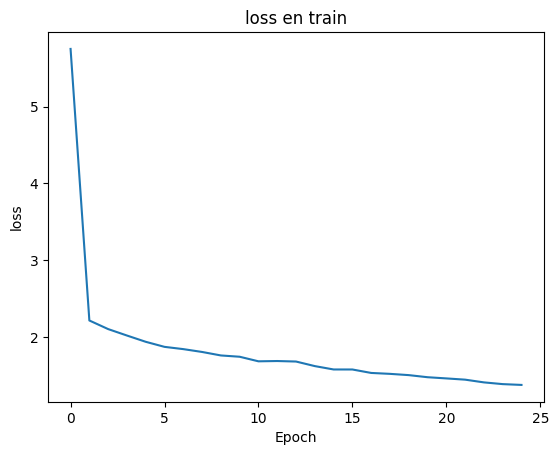

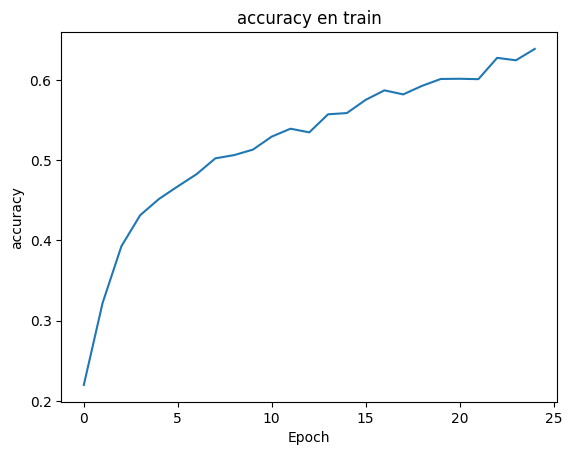

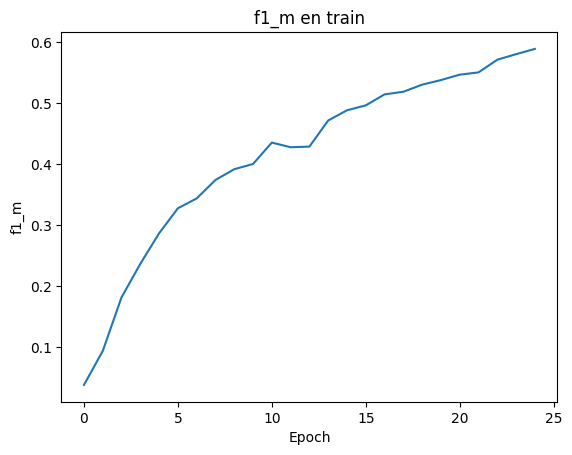

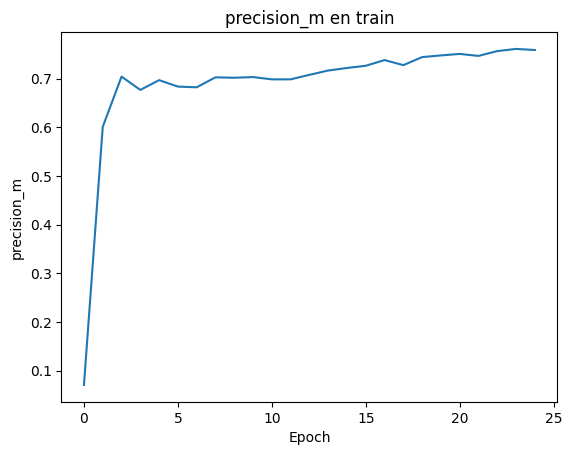

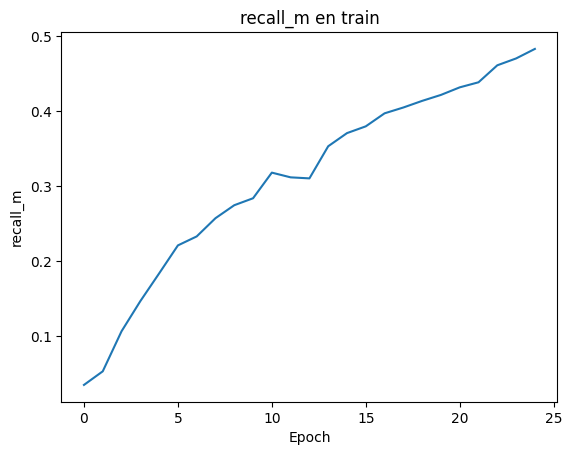

39/39 [==============================] - 2s 46ms/step - loss: 1.4861 - accuracy: 0.6100 - f1_m: 0.5616 - precision_m: 0.7844 - recall_m: 0.4418
Loss en el conjunto de prueba: 1.4860998392105103
F1-Score en el conjunto de prueba: 0.5616466403007507
Precision en el conjunto de prueba: 0.7843663692474365
Recall en el conjunto de prueba: 0.4418269395828247
Accuracy en el conjunto de prueba: 0.6100323796272278
39/39 [==============================] - 1s 29ms/step


epoch/accuracy,▁▃▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇███
epoch/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
epoch/f1_m,▁▂▃▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇████
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/precision_m,▁▆▇▇▇▇▇▇▇▇▇▇▇████████████
epoch/recall_m,▁▁▂▃▃▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇███
epoch/val_accuracy,▁▃▄▄▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇█▇███▇
epoch/val_f1_m,▁▃▃▄▅▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇████
epoch/val_loss,█▆▆▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▁▁▂▁▁▁▁
epoch/val_precision_m,▁▇█▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇


wandb: Agent Starting Run: ibh15iyi with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Epoch 1/25
124/124 [==============================] - 18s 140ms/step - loss: 4.3818 - accuracy: 0.2472 - f1_m: 0.0530 - precision_m: 0.2041 - recall_m: 0.0370 - val_loss: 2.1067 - val_accuracy: 0.3984 - val_f1_m: 0.1716 - val_precision_m: 0.9145 - val_recall_m: 0.0960
Epoch 2/25
124/124 [==============================] - 17s 136ms/step - loss: 2.1275 - accuracy: 0.3838 - f1_m: 0.1663 - precision_m: 0.6733 - recall_m: 0.0982 - val_loss: 1.9492 - val_accuracy: 0.4934 - val_f1_m: 0.2069 - val_precision_m: 0.9115 - val_recall_m: 0.1182
Epoch 3/25
124/124 [==============================] - 17s 141ms/step - loss: 2.0213 - accuracy: 0.4306 - f1_m: 0.2345 - precision_m: 0.6772 - recall_m: 0.1463 - val_loss: 1.8702 - val_accuracy: 0.5116 - val_f1_m: 0.2428 - val_precision_m: 0.8974 - val_recall_m: 0.1423
Epoch 4/25
124/124 [==============================] - 19s 155ms/step - loss: 1.9079 - accuracy: 0.4662 - f1_m: 0.3106 - precision_m: 0.6802 - recall_m: 0.2052 - val_loss: 1.8506 - val_accuracy:

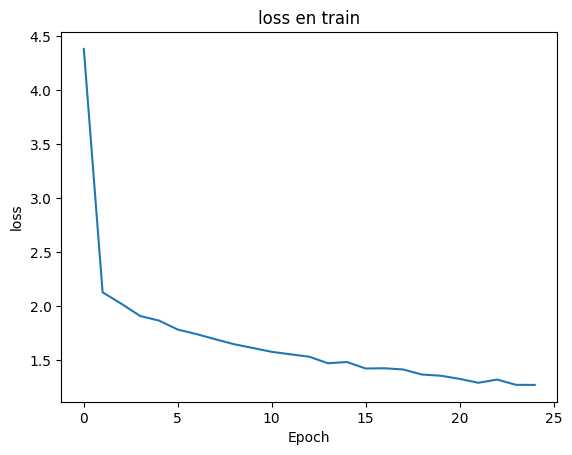

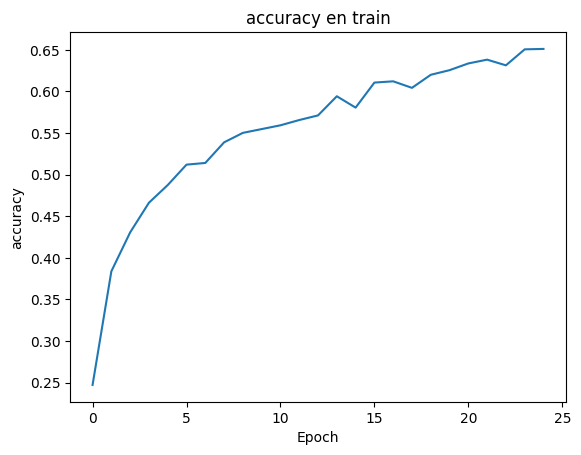

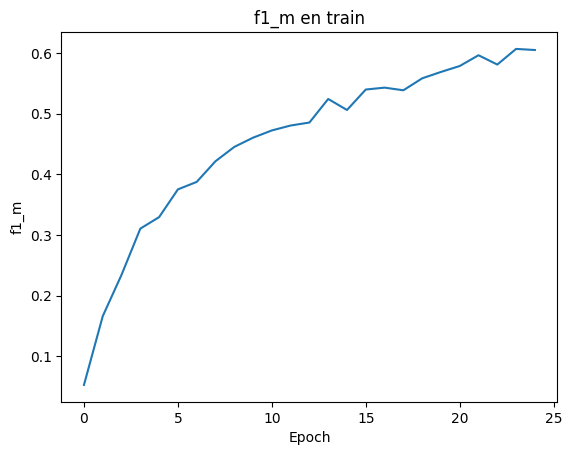

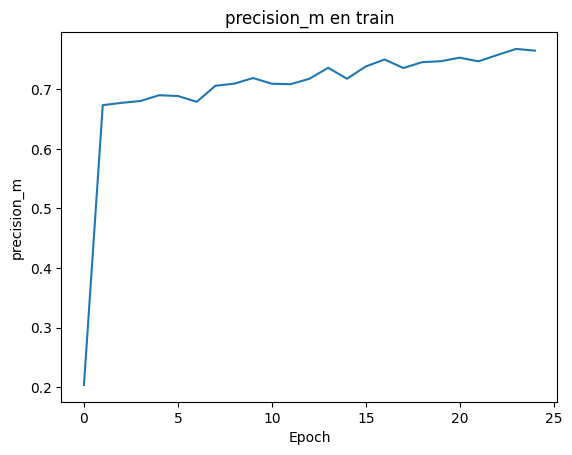

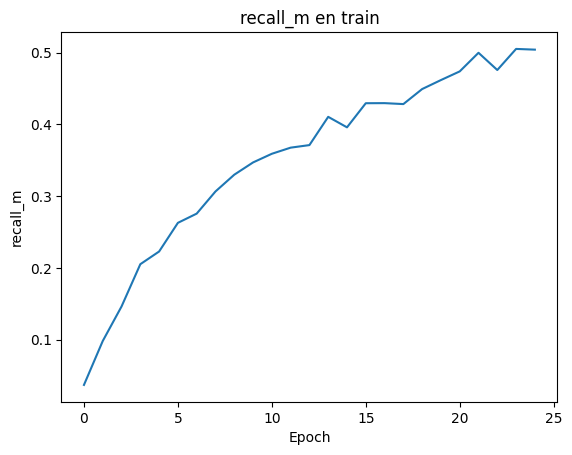

39/39 [==============================] - 1s 30ms/step - loss: 1.4011 - accuracy: 0.5971 - f1_m: 0.5221 - precision_m: 0.7719 - recall_m: 0.3992
Loss en el conjunto de prueba: 1.4011428356170654
F1-Score en el conjunto de prueba: 0.5221437811851501
Precision en el conjunto de prueba: 0.7718678712844849
Recall en el conjunto de prueba: 0.3991987407207489
Accuracy en el conjunto de prueba: 0.5970873832702637
39/39 [==============================] - 2s 41ms/step


epoch/accuracy,▁▃▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████
epoch/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
epoch/f1_m,▁▂▃▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇██████
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/precision_m,▁▇▇▇▇▇▇▇▇▇▇▇▇█▇██████████
epoch/recall_m,▁▂▃▄▄▄▅▅▅▆▆▆▆▇▆▇▇▇▇▇█████
epoch/val_accuracy,▁▄▄▅▄▅▆▆▆▇▆▆▇▇▇▇▇▇▇█▇▇█▇█
epoch/val_f1_m,▁▂▂▂▃▄▆▄▅▆▇▆▇▇▆▇▇▇▇▇▇▇██▇
epoch/val_loss,█▇▆▆▅▄▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▂▁▁▁
epoch/val_precision_m,██▇▅▄▄▂▃▂▄▂▄▃▂▂▁▂▁▁▃▂▂▂▂▃


In [40]:

num_categorias = len(np.unique(categories))


categorias_encoded, categorias_mapping = np.unique(categories, return_inverse=True)
categorias_encoded = to_categorical(categorias_mapping, num_categorias)

print(len(images),len(categorias_encoded),len(categories))


imagenes_train, imagenes_test, categorias_train, categorias_test = train_test_split(
    images, categorias_encoded, test_size=0.2, random_state=42)



sweep_config = {
    'method': 'random',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [ 0.01,0.001, 0.0001]
        },
        'batch_size': {
            'values': [32,64,128]
        },
    }
}

sweep_id = wandb.sweep(sweep_config, project="Htuning-tienda_inglesa")

def train():
    run = wandb.init()
    config = run.config

    opt = Adam(learning_rate=config.learning_rate)


    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(num_categorias, activation='softmax'))


    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m])

    wandb_callbacks = [
        WandbMetricsLogger(),
    ]

    fitted = model.fit(imagenes_train, categorias_train, epochs=30, validation_split=0.2, batch_size=config.batch_size, callbacks=wandb_callbacks)

    date_time = datetime.now()
    model.save(f'model.h5')
    plot_fit(fitted)
    loss, accuracy,f1,precision,recall = model.evaluate(imagenes_test, categorias_test)
    print(f"Loss en el conjunto de prueba: {loss}")
    print(f"F1-Score en el conjunto de prueba: {f1}")
    print(f"Precision en el conjunto de prueba: {precision}")
    print(f"Recall en el conjunto de prueba: {recall}")

    print(f"Accuracy en el conjunto de prueba: {accuracy}")

    predicciones = model.predict(imagenes_test)

    artifact = wandb.Artifact(f"model", type='model')
    artifact.add_file(f'model.h5')
    run.log_artifact(artifact)
    # run.link_artifact(model, 'model-registry/model')
    wandb.finish()


wandb.agent(sweep_id, function=train,count=5)


#Gradio

In [41]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

Epoch 1/2
124/124 [==============================] - 35s 272ms/step - loss: 3.9434 - accuracy: 0.2370 - f1_m: 0.0445 - precision_m: 0.2440 - recall_m: 0.0300 - val_loss: 2.1669 - val_accuracy: 0.3883 - val_f1_m: 0.1191 - val_precision_m: 0.9409 - val_recall_m: 0.0647
Epoch 2/2
124/124 [==============================] - 31s 253ms/step - loss: 2.1809 - accuracy: 0.3339 - f1_m: 0.1160 - precision_m: 0.6792 - recall_m: 0.0647 - val_loss: 2.0686 - val_accuracy: 0.4216 - val_f1_m: 0.1516 - val_precision_m: 0.9091 - val_recall_m: 0.0840


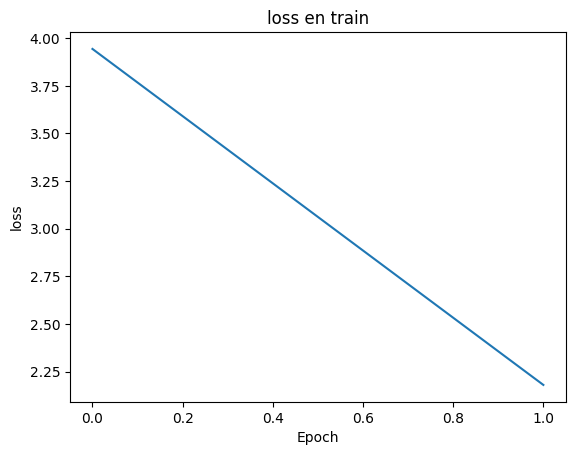

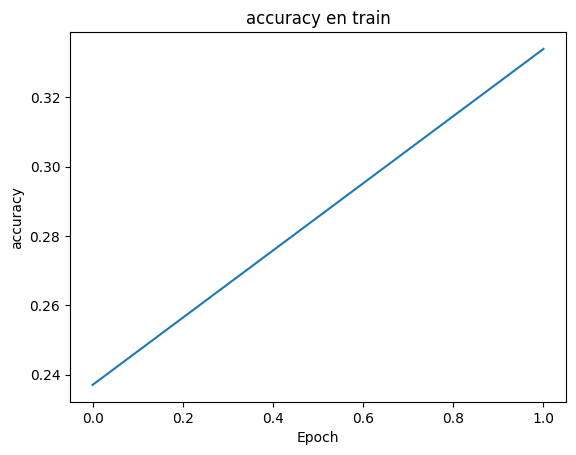

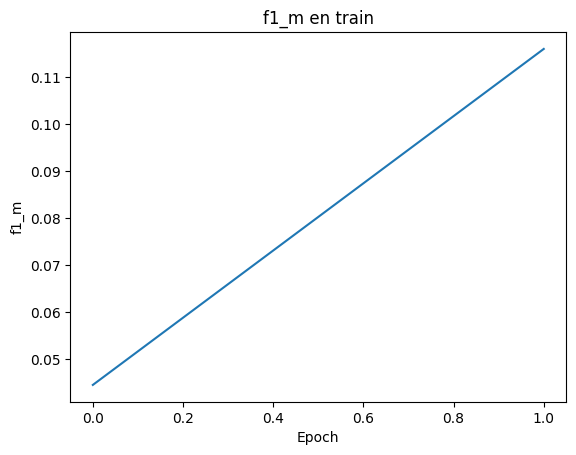

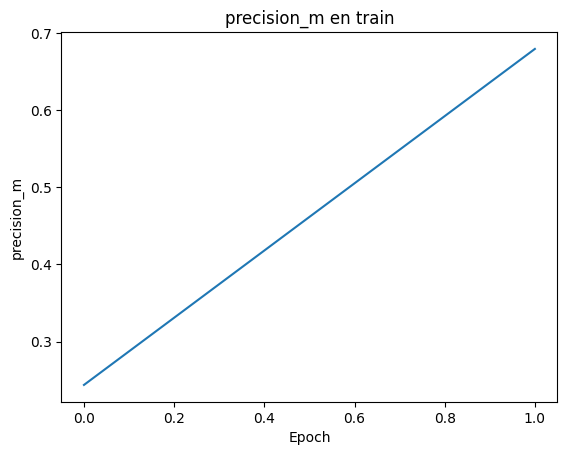

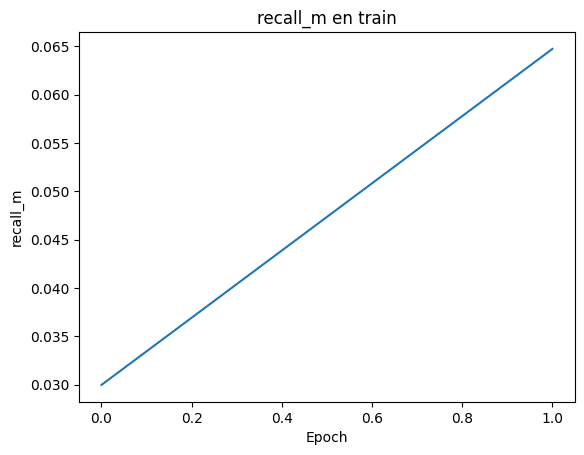

39/39 [==============================] - 1s 27ms/step - loss: 2.1129 - accuracy: 0.3956 - f1_m: 0.0952 - precision_m: 0.8248 - recall_m: 0.0513
Loss en el conjunto de prueba: 2.1129424571990967
F1-Score en el conjunto de prueba: 0.09521934390068054
Precision en el conjunto de prueba: 0.824786365032196
Recall en el conjunto de prueba: 0.05128205195069313
Accuracy en el conjunto de prueba: 0.3956310749053955


In [42]:
opt = Adam(learning_rate=0.001)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(num_categorias, activation='softmax'))


model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m])


fitted = model.fit(imagenes_train, categorias_train, epochs=30, validation_split=0.2, batch_size=32)

plot_fit(fitted)
loss, accuracy,f1,precision,recall = model.evaluate(imagenes_test, categorias_test)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"F1-Score en el conjunto de prueba: {f1}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")

print(f"Accuracy en el conjunto de prueba: {accuracy}")


In [43]:
def classify_image(image):
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)


    return {valid_categories[i]: float(prediction[0][i]) for i in range(num_categorias)}

In [44]:
import gradio as gr
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.inputs.Image(shape=(IMAGE_SIZE, IMAGE_SIZE)),
    outputs=gr.outputs.Label(num_top_classes=num_categorias),
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a60791647ff3a93dcf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#Quantization

In [51]:
!pip uninstall markupsafe


Found existing installation: MarkupSafe 2.1.3
Uninstalling MarkupSafe-2.1.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/MarkupSafe-2.1.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/markupsafe/*
Proceed (Y/n)? y
  Successfully uninstalled MarkupSafe-2.1.3


In [52]:
!pip install tensorflow_model_optimization


In [53]:
import tensorflow as tf
from tensorflow_model_optimization.sparsity import keras as sparsity

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [59]:
def classify_image_2(image):
    print(image)
    image = image.astype(np.float32) / 255.0

    image = np.expand_dims(image, axis=0)

    interpreter = tf.lite.Interpreter(model_path="quantized_model.tflite")
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], image)

    interpreter.invoke()

    prediction = interpreter.get_tensor(output_details[0]['index'])

    return {valid_categories[i]: float(prediction[0][i]) for i in range(num_categorias)}


In [60]:
import gradio as gr

iface = gr.Interface(
    fn=classify_image_2,
    inputs=gr.inputs.Image(shape=(IMAGE_SIZE, IMAGE_SIZE)),
    outputs=gr.outputs.Label(num_top_classes=num_categorias),
)
iface.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://666e70c5bd03d0de42.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


[[[  0  84 255]
  [  0  85 255]
  [  0  85 255]
  ...
  [  0  85 255]
  [  0  84 255]
  [  0  84 255]]

 [[  0  85 255]
  [  0  85 254]
  [  0  85 254]
  ...
  [  0  85 254]
  [  0  85 254]
  [  0  85 255]]

 [[  0  86 254]
  [  0  86 255]
  [  0  87 255]
  ...
  [  0  87 255]
  [  0  86 255]
  [  0  85 254]]

 ...

 [[  4   8  15]
  [  5  20  37]
  [ 15  74 123]
  ...
  [ 15  89 142]
  [ 34  83 124]
  [ 98 154 218]]

 [[  4   8  16]
  [  3  13  28]
  [ 11  66 112]
  ...
  [  4  47  80]
  [ 58 116 169]
  [ 85 146 202]]

 [[  4   7  15]
  [  3   8  19]
  [  6  51  92]
  ...
  [ 29  89 137]
  [ 61 128 188]
  [ 74 137 194]]]
[[[  8   9  12]
  [ 10  10  14]
  [ 10  11  15]
  ...
  [  9   7  14]
  [ 35  31  32]
  [ 58  48  47]]

 [[  9   9  13]
  [ 10  10  15]
  [ 11  11  15]
  ...
  [ 10   9  15]
  [ 27  24  26]
  [ 44  39  38]]

 [[  9  10  14]
  [ 10  11  15]
  [ 12  12  16]
  ...
  [ 10  10  14]
  [ 24  23  25]
  [ 37  34  33]]

 ...

 [[251 233 214]
  [251 229 209]
  [249 225 204]
  ..

#Prunning

Epoch 1/20
124/124 [==============================] - 26s 147ms/step - loss: 1.8957 - accuracy: 0.3891 - f1_m: 0.1644 - precision_m: 0.6344 - recall_m: 0.0998 - val_loss: 1.7121 - val_accuracy: 0.4520 - val_f1_m: 0.1679 - val_precision_m: 0.9054 - val_recall_m: 0.0942
Epoch 2/20
124/124 [==============================] - 17s 138ms/step - loss: 1.6841 - accuracy: 0.4478 - f1_m: 0.2509 - precision_m: 0.6807 - recall_m: 0.1604 - val_loss: 1.5819 - val_accuracy: 0.5066 - val_f1_m: 0.1770 - val_precision_m: 0.8731 - val_recall_m: 0.1002
Epoch 3/20
124/124 [==============================] - 18s 142ms/step - loss: 1.5982 - accuracy: 0.4660 - f1_m: 0.2856 - precision_m: 0.6932 - recall_m: 0.1844 - val_loss: 1.4861 - val_accuracy: 0.5137 - val_f1_m: 0.3134 - val_precision_m: 0.7861 - val_recall_m: 0.1984
Epoch 4/20
124/124 [==============================] - 17s 138ms/step - loss: 1.5564 - accuracy: 0.4814 - f1_m: 0.3104 - precision_m: 0.6584 - recall_m: 0.2088 - val_loss: 1.5062 - val_accuracy:

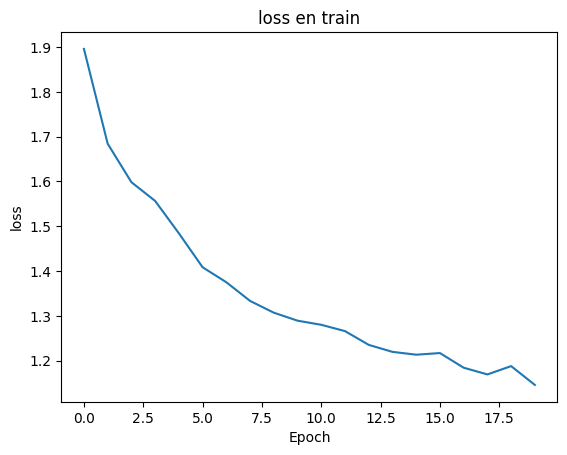

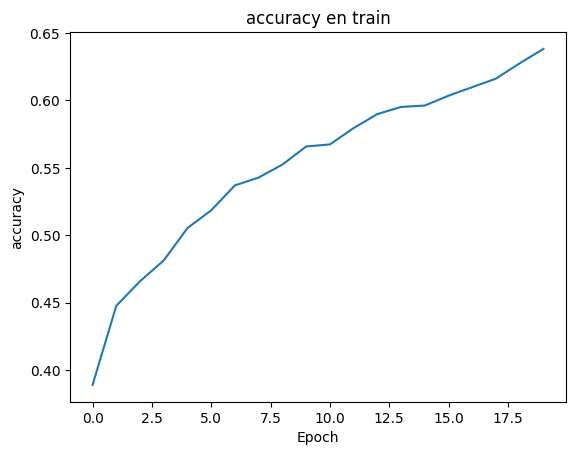

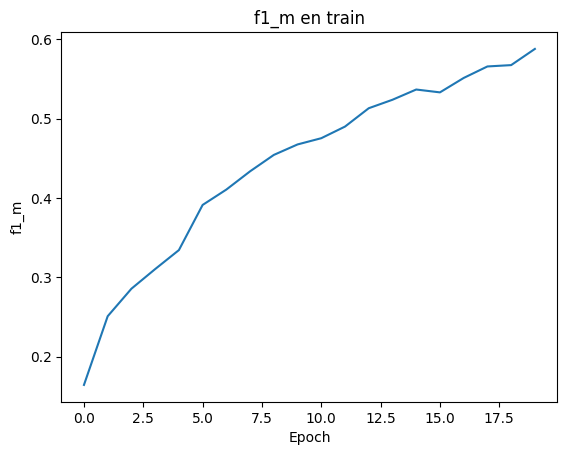

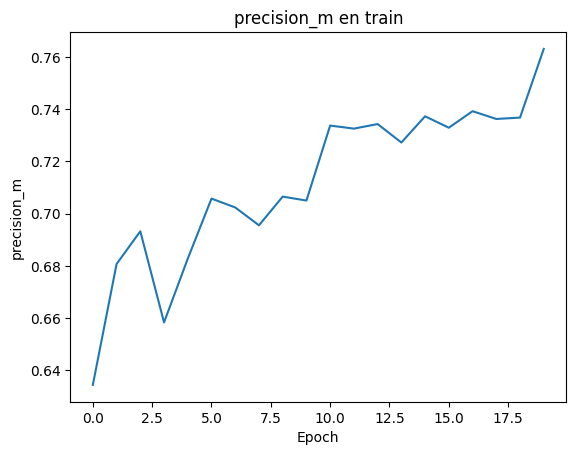

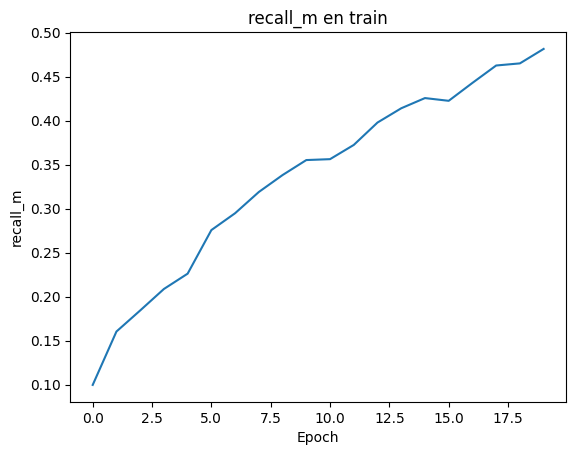

39/39 [==============================] - 1s 28ms/step - loss: 1.3304 - accuracy: 0.5922 - f1_m: 0.5009 - precision_m: 0.7325 - recall_m: 0.3841
Loss en el conjunto de prueba: 1.3304318189620972
F1-Score en el conjunto de prueba: 0.5009397268295288
Precision en el conjunto de prueba: 0.7324791550636292
Recall en el conjunto de prueba: 0.3841346204280853
Accuracy en el conjunto de prueba: 0.5922330021858215


In [50]:
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.0,
                                                   final_sparsity=0.5,
                                                   begin_step=0,
                                                   end_step=1000)
}

# Envolver el modelo con las capas de pruning. Esto agregará una operación de pruning a cada capa de nuestro modelo.
model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)

# Necesitamos recompilar el modelo después de agregar las capas de pruning.
model_for_pruning.compile(optimizer='adam',
                          loss="categorical_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m])

# Entrenar el modelo con callbacks para habilitar pruning.
# El callback UpdatePruningStep asegurará que el estado del pruning se actualiza en cada paso de entrenamiento.
callbacks = [
  sparsity.UpdatePruningStep(),
]


fitted = model_for_pruning.fit(imagenes_train, categorias_train, epochs=20, validation_split=0.2, batch_size=32,callbacks=callbacks)

plot_fit(fitted)
loss, accuracy,f1,precision,recall = model.evaluate(imagenes_test, categorias_test)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"F1-Score en el conjunto de prueba: {f1}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")

print(f"Accuracy en el conjunto de prueba: {accuracy}")


